<a href="https://colab.research.google.com/github/ferareosa/ATP_Analisis_Matematico/blob/main/ABP_Analisis_Matematico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TECNICATURA SUPERIOR EN CIENCIAS DE DATOS E INTELIGENCIA ARTIFICIAL

### ANÁLISIS MATEMÁTICO 2025  
<br>

---
<br>

## Introducción
<br>

En este informe se presenta un análisis detallado sobre el modelado de crecimiento de las redes sociales, utilizando técnicas de ciencia de datos y matemática.  
Las redes sociales han experimentado un crecimiento exponencial en los últimos años, y comprender los factores que influyen en este crecimiento es esencial para optimizar su uso y desarrollo.

<br>

---

<br>

## INTEGRANTES DEL GRUPO
  
- Areosa, Fernando. 36131545    
- Muñoz Brizuela, Fátima Belén. 39824821  
- Varela, Mario. 31401019

<br>

---
<br>

## NOMBRE DEL PROYECTO  
**"¿Qué lenguaje crece más rápido en popularidad por año?"**

<br>

---


<br>

## ACCIONES

1. Búsqueda y selección de un dataset relacionado con la popularidad y uso de lenguajes de programación (fuentes abiertas como Kaggle, GitHub o publicaciones especializadas).

2. Depuración de los datos para extraer la información relevante que permita construir funciones y representaciones gráficas claras.

3. Elaboración de funciones y visualizaciones utilizando código en Python, con el apoyo de librerías como Pandas, Matplotlib y Seaborn para realizar un análisis riguroso.

4. Formulación de conjeturas por parte del grupo, basadas en la interpretación de los datos y en las tendencias observadas.

5. Presentación del análisis como herramienta para comprender la evolución de los lenguajes más demandados en la industria.

<br>



---

<br>

##Instrucciones

Hacé clic en **Entorno de ejecución > Ejecutar todo** (o presioná `Ctrl+F9`) para ver la información generada por el código y los gráficos.

<br>


In [ ]:
# Se importan las herramientas a utilizarse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

---

##1. Búsqueda y selección de un dataset relacionado con la popularidad y uso de lenguajes de programación
<br>

Para abordar esta problemática, se seleccionó una base de datos disponible en el siguiente repositorio de GitHub:

[Stack Overflow Trends Analysis](https://github.com/rania3103/stack-overflow-trends-analysis?utm_source=chatgpt.com)

Este conjunto de datos recopila información sobre la cantidad de usuarios que interactúan con distintos lenguajes de programación en la plataforma Stack Overflow, organizada en función de fechas específicas.
Dicha fuente resulta pertinente para el análisis, ya que permite observar tendencias en el uso de lenguajes a lo largo del tiempo, facilitando así el desarrollo de modelos interpretativos y predictivos sobre su evolución en la industria.

<br>

---

In [ ]:
# @title Tabla 1
# Se lee el archivo bajado y resubido a un repositorio de gitHub propio y se muestra la informacion del mismo.
db = pd.read_csv("https://raw.githubusercontent.com/ferareosa/ATP_Analisis_Matematico/refs/heads/main/TotalQuestions.csv")
db

,Month,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,...,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
0,2008-09-01,755,1639,0,474,0,286,0,503,0,...,65,320,328,50,130,11,6,537,634,1129
1,2008-11-01,734,1729,0,499,0,157,0,413,0,...,51,258,327,106,97,11,1,448,580,954
2,2008-12-01,630,1594,0,476,0,159,0,424,0,...,51,188,309,123,133,13,1,437,625,825
3,2009-01-01,848,2374,0,628,1,205,0,585,0,...,47,318,414,143,146,19,8,631,790,1147
4,2009-02-01,841,2597,0,757,1,286,0,668,0,...,75,331,480,209,163,27,8,630,945,1202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2023-10-01,1719,3193,1874,1546,905,196,421,1241,945,...,191,973,2278,49,53,143,2066,9031,5489,3437
181,2023-11-01,1471,3117,1760,1402,868,157,411,1238,952,...,146,958,1919,54,44,128,1998,8482,5198,3283
182,2023-12-01,1439,2652,1564,1205,748,154,326,1027,838,...,105,878,1817,44,53,109,1608,7028,4793,2549
183,2024-01-01,1656,2775,1693,1454,898,166,352,1127,859,...,122,846,1996,39,35,108,1836,8024,5272,3011


---
##2. Depuración de los datos
<br>

Como se puede observar en la Tabla 1, el dataset incluye 20 lenguajes de programación y las fechas en las que se recopilaron los datos.

A efectos prácticos de este análisis, se seleccionarán los cinco lenguajes de programación más utilizados en nuestro rubro (Python, R, SQL, Java y C++). Asimismo, como se aprecia en la misma tabla, existe más de un registro por año; por lo tanto, se calculará un promedio para cada año registrado.

<br>

Como se observa en la ***Tabla final***, en comparación con la ***Tabla 1***, se pasó de un DataFrame con 21 columnas y 185 registros a un `db_final` con solo 6 columnas y 17 registros, uno por cada año. Esta transformación permite un análisis más claro y representativo de la evolución anual en el uso de los lenguajes seleccionados.

<br>

---


In [ ]:
# @title Tabla 2
# Se seleccionan los 5 lenguajes mas usados y las fechas del dataframe
columnas_seleccionadas = ['Month', 'Python', 'R', 'SQL', 'Java', 'C++']
db_reducido = db[columnas_seleccionadas]
db_reducido

,Month,Python,R,SQL,Java,C++
0,2008-09-01,537,6,503,634,755
1,2008-11-01,448,1,413,580,734
2,2008-12-01,437,1,424,625,630
3,2009-01-01,631,8,585,790,848
4,2009-02-01,630,8,668,945,841
...,...,...,...,...,...,...
180,2023-10-01,9031,2066,1241,5489,1719
181,2023-11-01,8482,1998,1238,5198,1471
182,2023-12-01,7028,1608,1027,4793,1439
183,2024-01-01,8024,1836,1127,5272,1656


In [ ]:
# @title Tabla Final

# Renombrar la columna 'Month' a 'Año'
db_reducido = db_reducido.rename(columns={'Month': 'Año'})

# Convertir el valor de la columna 'Año' al año como numero entero
db_reducido['Año'] = pd.to_datetime(db_reducido['Año']).dt.year

# Agrupar por 'Año' y calcular el promedio de las columnas de interés
db_final = db_reducido.groupby('Año', as_index=False).agg({
    'Python': 'mean',
    'R': 'mean',
    'SQL': 'mean',
    'Java': 'mean',
    'C++': 'mean'
})

# Redondear los promedios y convertirlos a enteros
for col in ['Python', 'R', 'SQL', 'Java', 'C++']:
    db_final[col] = db_final[col].round().astype(int)
print("Tabla final")
db_final

Tabla final


,Año,Python,R,SQL,Java,C++
0,2008,474,3,447,613,706
1,2009,1070,43,982,1560,1301
2,2010,2247,188,1633,3621,2656
3,2011,3498,485,2552,7458,3977
4,2012,5329,1013,3576,11300,5234
5,2013,7999,1846,5434,16226,6810
6,2014,9647,2562,6285,19507,6849
7,2015,11389,3381,4561,21231,6631
8,2016,13160,3689,4636,21961,5935
9,2017,15950,4242,4617,20780,5150


---
##3. Elaboración de funciones y visualizaciones

<br>

La construcción de funciones y gráficos permitió modelar y analizar la evolución del uso de lenguajes de programación a lo largo del tiempo. Se ajustaron funciones polinómicas de grado 3 a los datos reales, lo que facilitó capturar tendencias no lineales y variaciones complejas. A partir de estas funciones, se calcularon derivadas para estimar la tasa de cambio anual.

Además, se incorporó una función lineal trazada entre el primer y el último punto del conjunto de datos, cuya pendiente fue calculada e incluida en los gráficos como indicador general de tendencia. Esta recta permite observar la dirección global del crecimiento o decrecimiento de cada lenguaje a lo largo del período analizado.

Las visualizaciones combinan datos reales, funciones ajustadas, derivadas y líneas de tendencia, permitiendo interpretar el comportamiento general, identificar aceleraciones, desaceleraciones y posibles discontinuidades, en línea con los conceptos de continuidad y derivabilidad desarrollados en las unidades teóricas.

Estas herramientas gráficas y funcionales aportan una base sólida para interpretar tendencias y tomar decisiones fundamentadas en el análisis matemático de los datos.

<br>

---

In [ ]:
# Variable simbólica para análisis con sympy
x = sp.Symbol('x')

# Función para ajustar un polinomio y graficar función + derivada
def ajustar_y_graficar(df, lenguaje):
    import matplotlib.pyplot as plt
    import numpy as np
    import sympy as sp

    años = df["Año"]
    valores = df[lenguaje]

    # Ajuste polinomial de grado 3
    coeficientes = np.polyfit(años, valores, deg=3)
    polinomio = np.poly1d(coeficientes)

    # Crear función simbólica y derivada
    x = sp.Symbol('x')
    f_sym = sum(sp.Float(c) * x**i for i, c in enumerate(coeficientes[::-1]))
    f_derivada = sp.diff(f_sym, x)

    # Convertir a funciones evaluables (lambdify)
    f_lambd = sp.lambdify(x, f_sym, modules="numpy")
    f_deriv_lambd = sp.lambdify(x, f_derivada, modules="numpy")

    # Crear valores para graficar
    x_vals = np.linspace(min(años), max(años), 300)
    y_vals = f_lambd(x_vals)
    y_deriv = f_deriv_lambd(x_vals)

    # ==============================
    # Función lineal entre extremos
    x0, x1 = años.iloc[0], años.iloc[-1]
    y0, y1 = valores.iloc[0], valores.iloc[-1]
    m = (y1 - y0) / (x1 - x0)  # pendiente
    recta_lineal = lambda x: m * (x - x0) + y0
    y_lineal = recta_lineal(x_vals)
    # ==============================

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(años, valores, 'o', label='Datos reales')
    plt.plot(x_vals, y_vals, '-', label='Ajuste polinómico grado 3')
    plt.plot(x_vals, y_deriv, '--', label='Derivada (pendiente)')
    plt.plot(x_vals, y_lineal, ':', color='black', label=f'Tendencia lineal (pendiente={m:.2f})')

    plt.title(f'Análisis de {lenguaje}: función, derivada y tendencia lineal')
    plt.xlabel('Año')
    plt.ylabel('Popularidad (medida)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def graficar_continuidad(df, lenguaje):
    años = df["Año"]
    valores = df[lenguaje]

    # Calcular diferencias año a año
    delta = np.diff(valores)

    # Detectar posibles discontinuidades: cambios bruscos (top 10% más altos)
    saltos = np.where(np.abs(delta) > np.percentile(np.abs(delta), 90))[0]

    # Graficar función y posibles discontinuidades
    plt.figure(figsize=(10, 5))
    plt.plot(años, valores, marker='o', label=f'{lenguaje}', linestyle='-')

    # Marcar puntos de salto
    for i in saltos:
        plt.axvline(x=años[i+1], color='red', linestyle='--', alpha=0.6)
        plt.annotate("posible salto",
                     (años[i+1], valores[i+1]),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontsize=8,
                     color='red')

    plt.title(f'Análisis visual de continuidad en {lenguaje}')
    plt.xlabel('Año')
    plt.ylabel('Popularidad (medida)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Reprecentacion grafica:

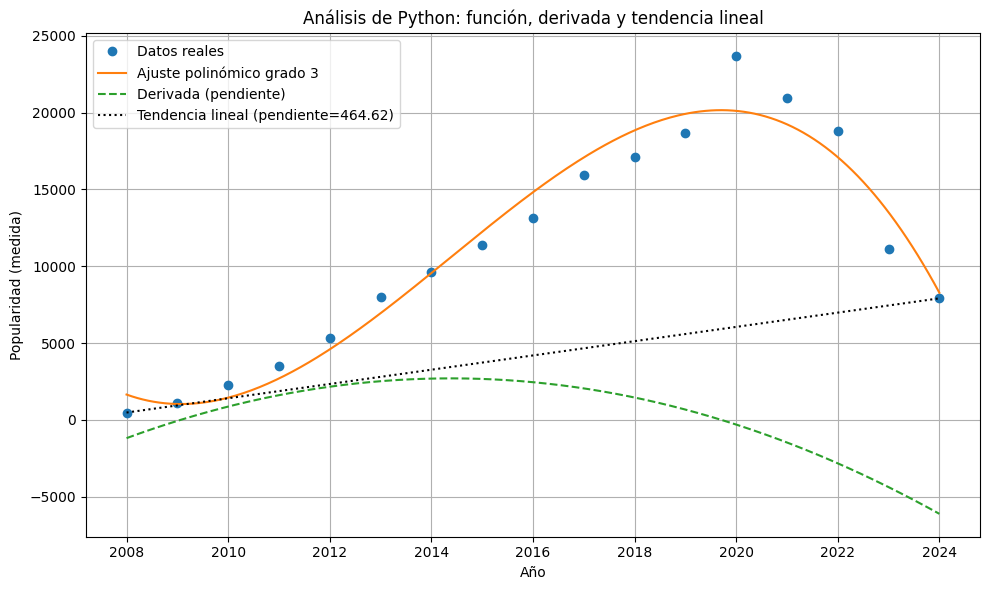

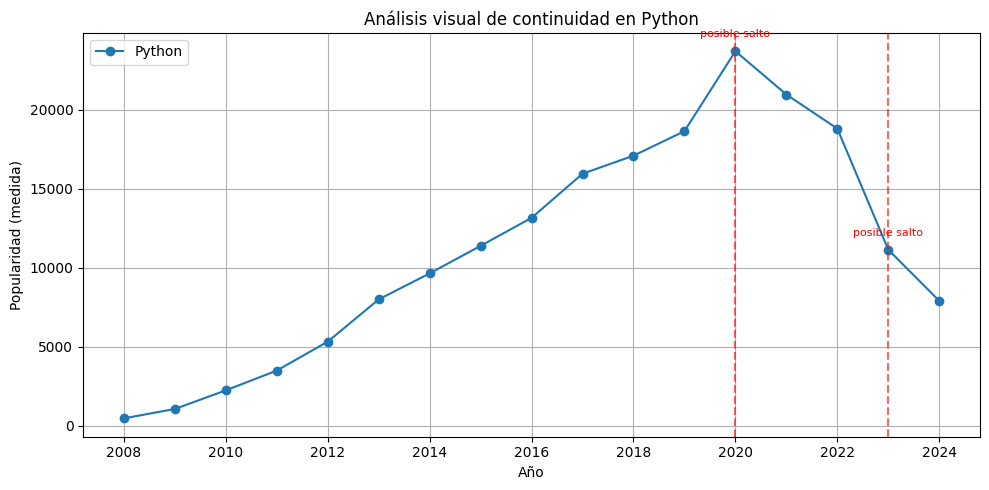

In [ ]:
# @title Graficos de Python
lenguaje = 'Python'
ajustar_y_graficar(db_final, lenguaje)
graficar_continuidad(db_final, lenguaje)

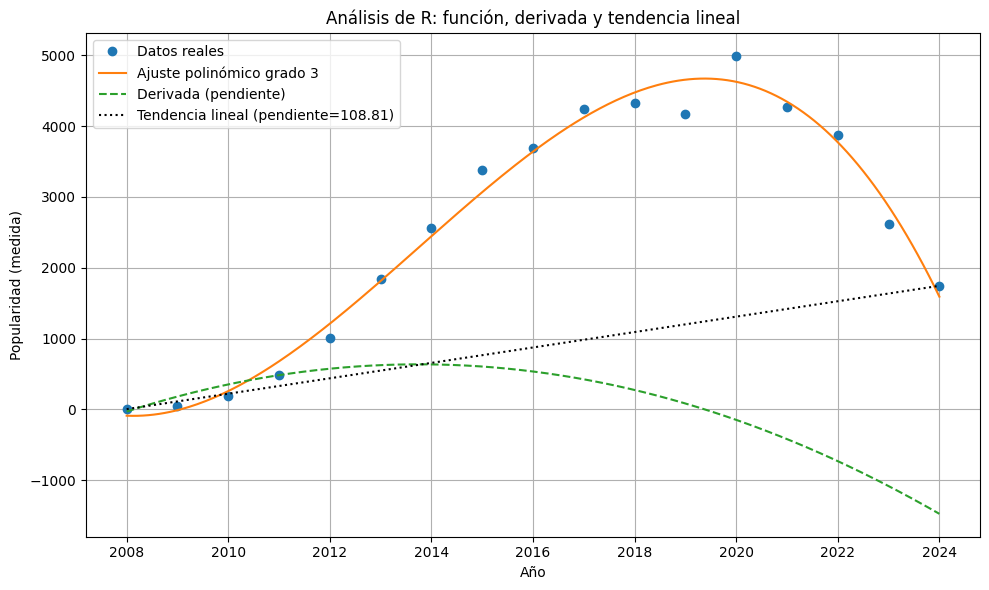

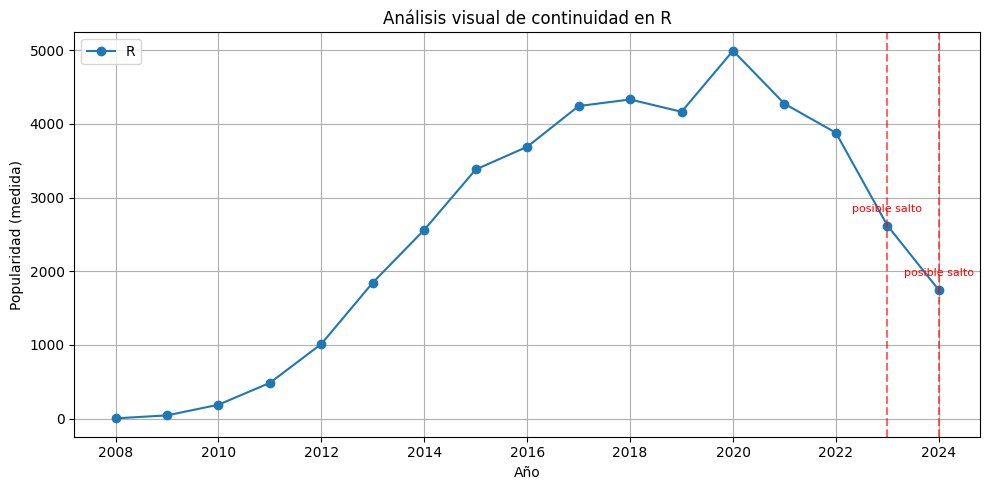

In [ ]:
# @title Graficos de R
lenguaje = 'R'
ajustar_y_graficar(db_final, lenguaje)
graficar_continuidad(db_final, lenguaje)

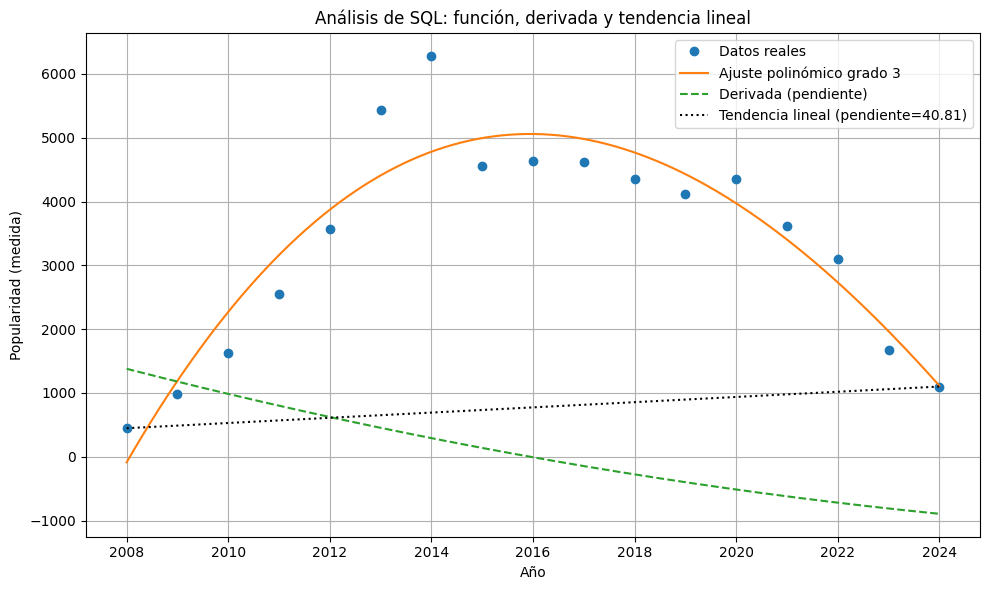

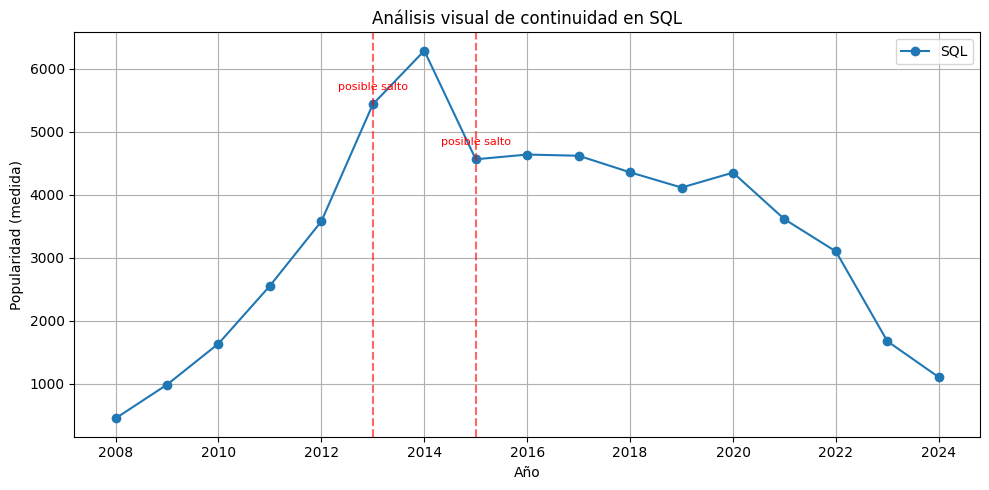

In [ ]:
# @title Graficos de SQL
lenguaje = 'SQL'
ajustar_y_graficar(db_final, lenguaje)
graficar_continuidad(db_final, lenguaje)

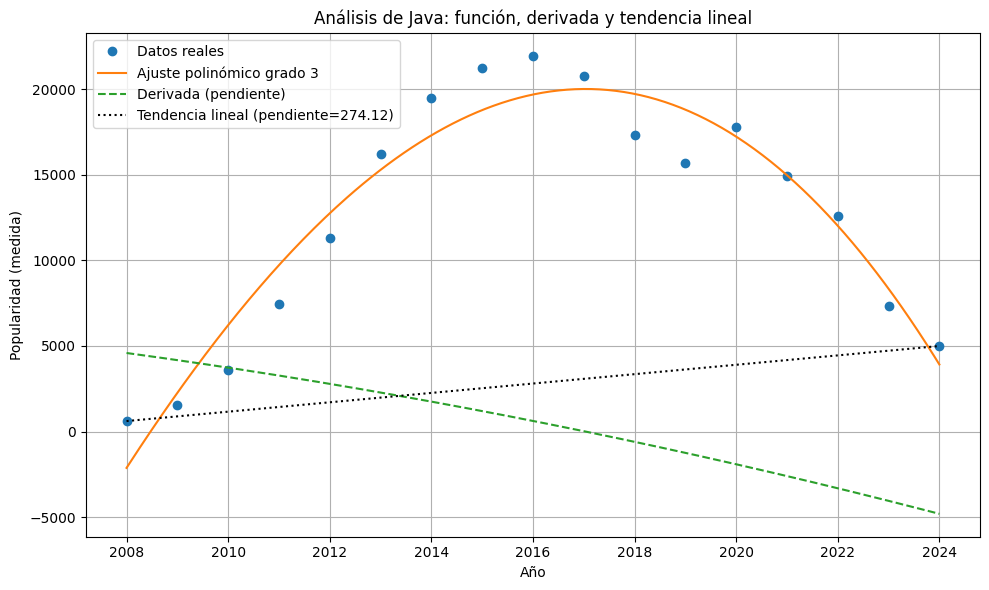

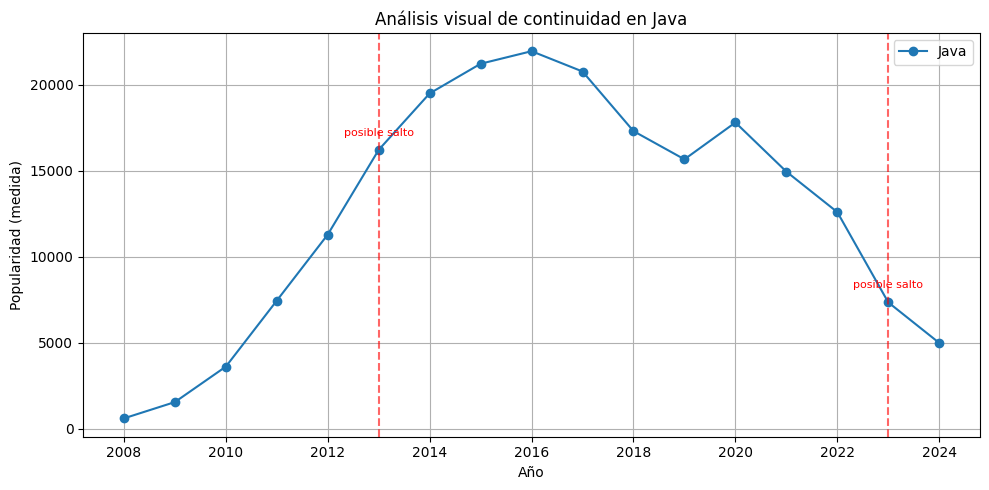

In [ ]:
# @title Graficos de Java
lenguaje = 'Java'
ajustar_y_graficar(db_final, lenguaje)
graficar_continuidad(db_final, lenguaje)

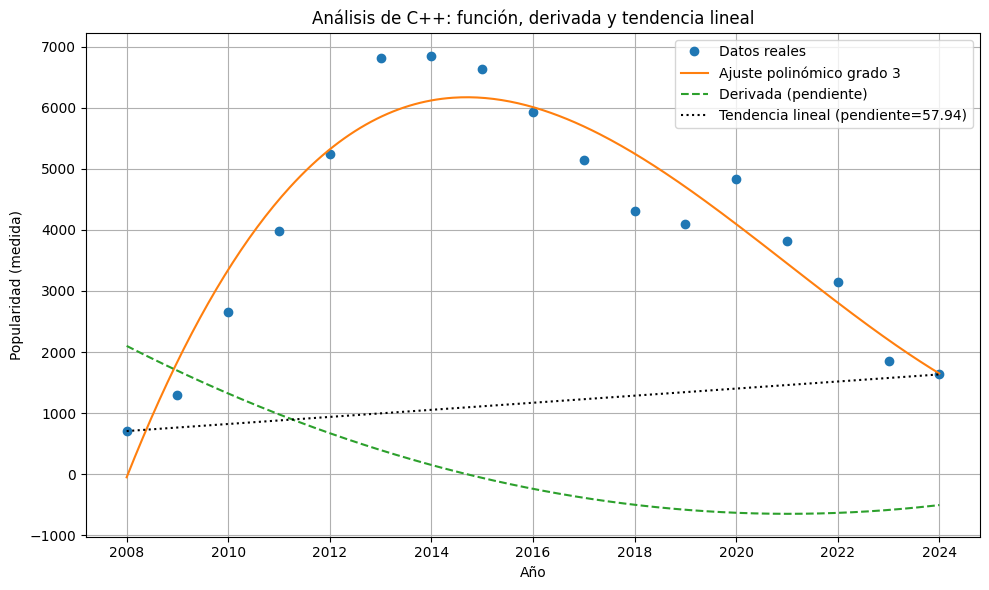

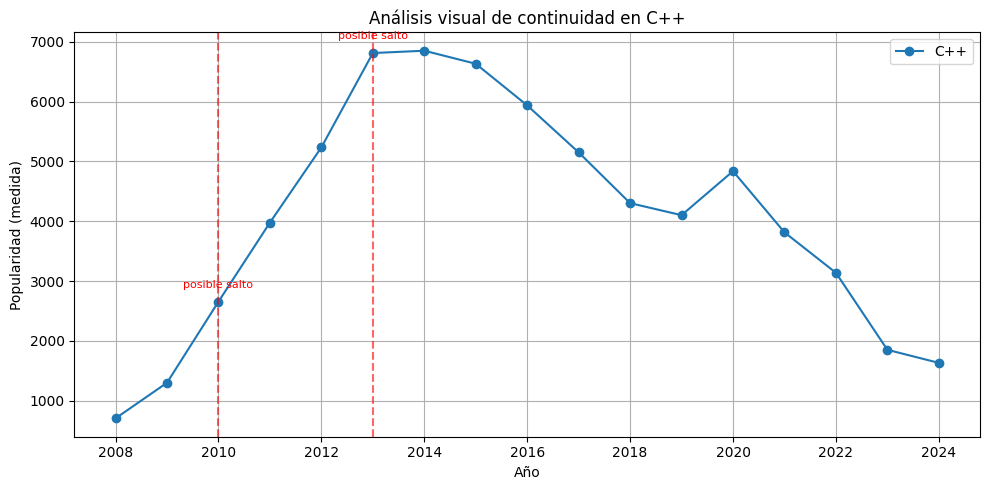

In [ ]:
# @title Graficos de C++
lenguaje = 'C++'
ajustar_y_graficar(db_final, lenguaje)
graficar_continuidad(db_final, lenguaje)

---
##4. Formulación de conjeturas por parte del grupo
<br>

A partir del análisis gráfico y funcional del uso de lenguajes de programación, fue posible formular diversas conjeturas fundamentadas en el comportamiento observado de los datos. El ajuste polinómico permitió detectar puntos de inflexión en las curvas de crecimiento, mientras que las derivadas aproximadas ofrecieron información sobre las tasas de cambio anuales.

La inclusión de una función lineal entre los extremos temporales permitió visualizar la tendencia global de cada lenguaje. En base a esto, se conjetura que lenguajes como Python y R presentaron un crecimiento sostenido durante la primera parte del período, con una desaceleración o posible saturación en los últimos años. En contraste, Java y C++ muestran una tendencia decreciente constante, lo que podría reflejar una pérdida de relevancia frente a lenguajes más versátiles o especializados.

Asimismo, los análisis de continuidad y las pendientes abruptas permitieron identificar años clave donde se produjeron cambios significativos. Estas rupturas pueden estar relacionadas con transformaciones en la industria del software, aparición de nuevas herramientas, o cambios en las preferencias de la comunidad desarrolladora.

En conjunto, el análisis sugiere que, de mantenerse las condiciones actuales, lenguajes como Python continuarán liderando el desarrollo en áreas como ciencia de datos e inteligencia artificial, mientras que otros lenguajes tradicionales podrían mantener un uso más estable o reducir su protagonismo en los próximos años. Estas conjeturas, si bien preliminares, abren la posibilidad de realizar proyecciones más profundas con modelos predictivos.

<br>

---
##5. Presentación del análisis como herramienta
<br>

Las conjeturas formuladas a partir del estudio matemático del uso de lenguajes de programación revelan el potencial del análisis cuantitativo como herramienta estratégica para perfiles técnicos. Identificar tendencias, estimar tasas de crecimiento o decrecimiento y detectar puntos de inflexión permite anticipar escenarios tecnológicos y fundamentar decisiones clave en el ámbito profesional.

Para quienes se desempeñan en ciencia de datos e inteligencia artificial, estas habilidades resultan especialmente valiosas. Comprender la evolución histórica de los lenguajes más utilizados —como Python, R o SQL— posibilita seleccionar herramientas alineadas con las demandas del mercado, optimizar la formación continua y diseñar soluciones tecnológicas sostenibles en el tiempo.

Este enfoque, que combina datos reales con funciones matemáticas, derivadas, análisis de continuidad y visualización, fortalece el perfil técnico al integrar capacidades analíticas con pensamiento crítico y visión estratégica. Así, el análisis no solo permite explicar lo que ocurrió, sino proyectar escenarios futuros con mayor claridad y respaldo lógico.

En suma, la formulación de conjeturas basada en datos concretos se convierte en un recurso clave para profesionales que deben desenvolverse en entornos dinámicos, donde la capacidad de interpretar y anticipar tendencias es tan importante como la de ejecutar soluciones técnicas.

<br>

---